## Simulazione dell'esame di Metodi Numerici


## Esercizio 1


# Esercizio 1
Nel file ``testI.mat`` sono memorizzati la matrice A ed il vettore b. 

 - Verificare che per risolvere il sistema Ax=b sia possibile utilizzare i due metodi di discesa visti a lezione. Richiamare il teorema che  garantisce che risolvere un sistema lineare con specifiche proprietà equivale a trovare il minimo di un opportuni funzionale quadratico.  [**Punti 2**]
 - implementare entrambi gli algoritmi e dire quante iterazioni sono necessarie per ciascuno di essi  per calcolare la soluzione con una toll=1e-6 e maxit=4000. Visualizzare in un grafico l'errore in scala logaritmica ad ogni iterazione per ciascuno dei due metodi. [**Punti 5**]
 - Verificare se la matrice è  malcondizionata, dire teoricamente cosa questo implica in termini di velocità di  convergenza alla soluzione di ciascuno dei due metodi, richiamando il risultato teorico visto a lezione. [**Punti 2**]

 - Costruire la matrice A1, ottenuta a partire da A sommandole una matrice diagonale con elementi sulla
      diagonali tutti uguali a 0.05
   nel seguente modo:
   
   A1=A+np.eye(A.shape[0])*0.05
   
   e termine noto b1, costruito in maniera tale che la soluzione del sistema A1 x1 =b1 sia il vettore formato da tutti 1.  Risolvere il sistema lineare con matrice dei coefficienti A1 e termine noto b1, sia con il metodo del gradiente che con il metodo del gradiente coniugato. Osservare il numero di iterazioni eseguito da ciascun metodo e giustificare i risultati  [**Punti 2**]
  
   **Totale: Punti 11**

Per la lettura dei dati procedere nel seguente modo:

``from scipy.io import loadmat``

``import numpy as np``

``dati = loadmat('testI.mat')``

``A=dati["A"] ``

``A=A.astype(float)``

`` b=dati["b"] ``

`` b=b.astype(float)``







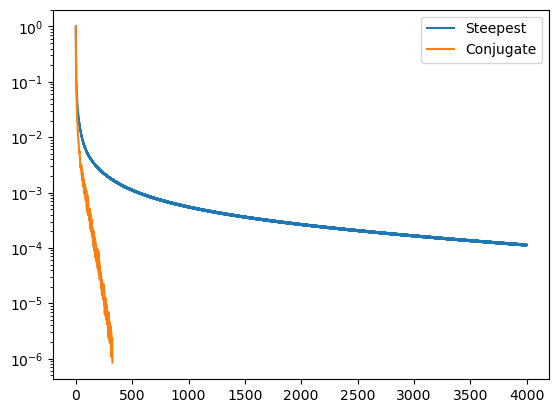

Condizionamento di A =  9999.9999999948
Iterazioni steepest =  4000
Iterazioni conjugate =  325


In [29]:
from scipy.io import loadmat

import numpy as np
import numpy.linalg as npl
import scipy.linalg as spl
import matplotlib.pyplot as plt

import sys, os

sys.path.append(os.path.abspath('../../Scheletri'))

import Schel_FULL as sf

dati = loadmat('testI.mat')
A=dati["A"] 

A=A.astype(float)

b=dati["b"] 

b=b.astype(float)
x0 = np.zeros_like(b)
toll = 1e-6
maxit = 4000

x_st, res_vec_st,sol_vec_st, numit_st = sf.steepestdescent(A, b, x0, maxit, toll)

x_cj, res_vec_cj,sol_vec_cj, numit_cj = sf.conjugate_gradient(A, b, x0, maxit, toll)

plt.semilogy(range(numit_st+1), res_vec_st, label = 'Steepest')
plt.semilogy(range(numit_cj+1), res_vec_cj, label = 'Conjugate')
plt.legend()
plt.show()

print("Condizionamento di A = ", npl.cond(A))
print("Iterazioni steepest = ", numit_st)
print("Iterazioni conjugate = ", numit_cj)

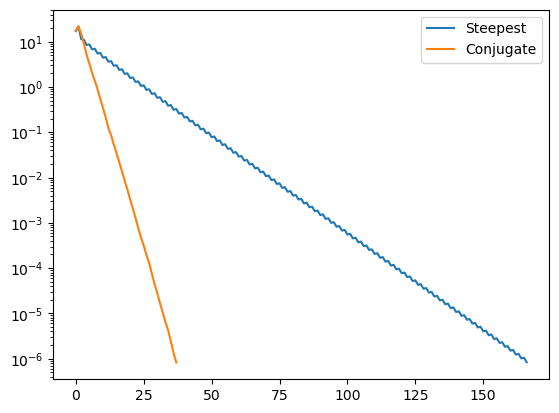

Condizionamento di A1 =  20.95808383233532
Iterazioni steepest =  166
Iterazioni conjugate =  37


In [30]:
A1 = A.copy()
A1=A1+np.eye(A1.shape[0])*0.05

b1 = np.sum(A1, 1)

x_st, res_vec_st,sol_vec_st, numit_st = sf.steepestdescent(A1, b1, x0, maxit, toll)

x_cj, res_vec_cj,sol_vec_cj, numit_cj = sf.conjugate_gradient(A1, b1, x0, maxit, toll)

plt.semilogy(range(numit_st+1), res_vec_st, label = 'Steepest')
plt.semilogy(range(numit_cj+1), res_vec_cj, label = 'Conjugate')
plt.legend()
plt.show()

print("Condizionamento di A1 = ", npl.cond(A1))
print("Iterazioni steepest = ", numit_st)
print("Iterazioni conjugate = ", numit_cj)

## Esercizio 2 ##

Siano assegnati i numpy array

x =[1.0,1.2,1.4,1.6,1.8,2.0,2.2,2.4,2.6,2.8,3.0] 

y =[1.18,1.26,1.23,1.37,1.37,1.45,1.42,1.46,1.53,1.59,1.59] 
                                                               
contenenti rispettivamente le ascisse e le ordinate di 11 punti nel piano.                                                          

Scrivere lo script python in cui:

- si calcola il polinomio di approssimazione ai minimi quadrati di grado 1 dei punti assegnati, sviluppando le functions necessarie. e lo si valuti su 200 punti equidistanti nell'intervallo [1,3]  [**Punti: 4**]

- si calcola il polinomio di interpolazione dei punti assegnati sviluppando le functions necessarie e lo si valuti su 200 punti equidistanti nell'intervallo [1,3]  [**Punti: 4**]

- Si modifichino le ordinate dei punti assegnati, facendo uso della formula   $\hat{y_i}=2*x_i+1$, $i=1,...,11$, e si ricalcoli il polinomio interpolante ed il polinomio di approssimazione di grado 1, a partire dalle coppie $(x_i,\hat{y_i})$, $i=1,11$   [**Punti: 1**]

- Si visualizzi in un grafico il polinomio interpolante, il polinomio di approssimazione di grado 1 ed i punti $(x_i,y_i), i=1,11$ ed in un altro grafico il polinomio interpolante, il polinomio di approssimazione di grado 1 ed i $(x_i,\hat{y_i})$, $i=1,11$  [**Punti:1**]

- Si fornisca una spiegazione teorica dei risultati ottenuti
  [**Punti: 4**]

                                                                        Totale 14 punti

rango= 2


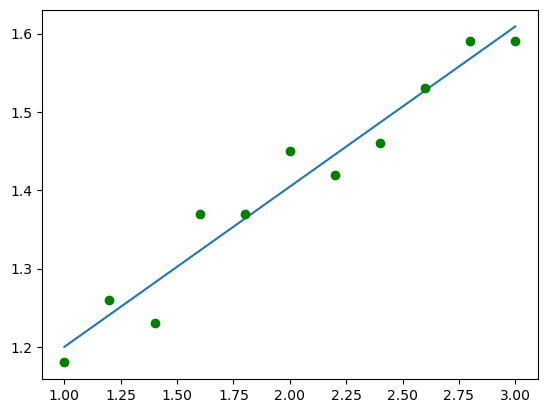

In [31]:
x =np.array([1.0,1.2,1.4,1.6,1.8,2.0,2.2,2.4,2.6,2.8,3.0])
y =np.array([1.18,1.26,1.23,1.37,1.37,1.45,1.42,1.46,1.53,1.59,1.59])

a, b = (1,3)

xx = np.linspace(a, b, 200)

n = 1
grad_lib = n+1

V = np.vander(x, increasing=True)[:, :grad_lib]

alpha_JAC, res_JAC = sf.SVDLS(V, y)

yy = np.polyval(np.flip(alpha_JAC), xx)

plt.plot(xx, yy, label = 'Retta ai minimi quadrati')
plt.plot(x, y, 'go',label = 'Nodi')
plt.show()

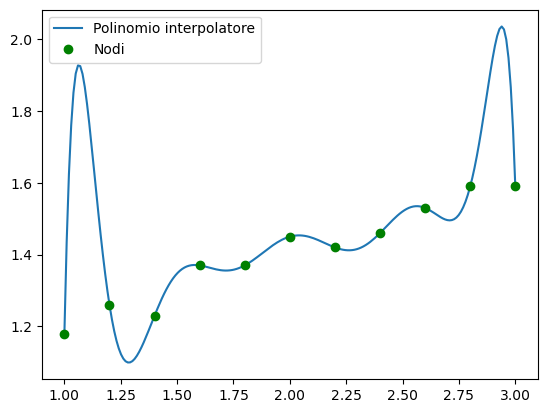

In [32]:
yy_int = sf.InterpL(x, y, xx)

plt.plot(xx, yy_int, label = 'Polinomio interpolatore')
plt.plot(x, y, 'go',label = 'Nodi')
plt.legend()
plt.show()

rango= 2


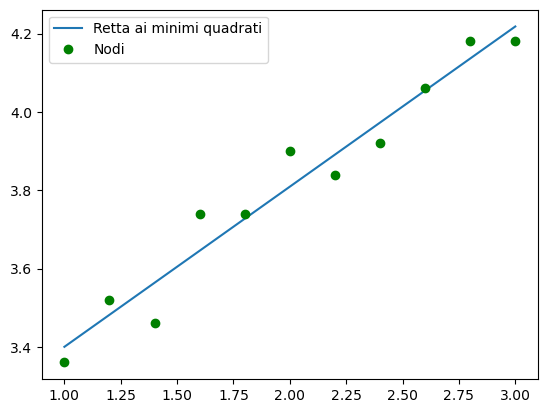

In [33]:
ypert = y.copy()
ypert = 2*ypert +1 

alpha_JAC, res_JAC = sf.SVDLS(V, ypert)

yy = np.polyval(np.flip(alpha_JAC), xx)

plt.plot(xx, yy, label = 'Retta ai minimi quadrati')
plt.plot(x, ypert, 'go',label = 'Nodi')
plt.legend()
plt.show()

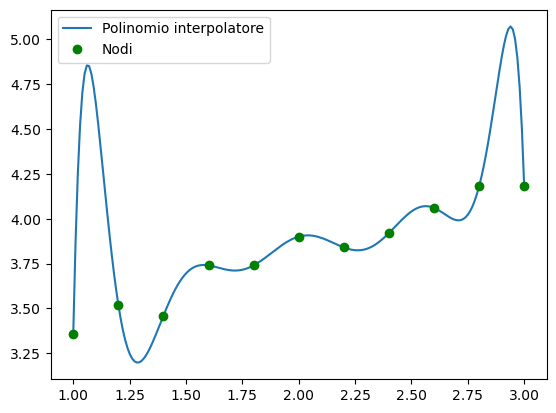

In [34]:
yy_int = sf.InterpL(x, ypert, xx)

plt.plot(xx, yy_int, label = 'Polinomio interpolatore')
plt.plot(x, ypert, 'go',label = 'Nodi')
plt.legend()
plt.show()

## Domanda intelligenza artificiale

- Importanza del learning rate nell'allenamento di una rete neurale 
[**Punti: 1**]
- Illustra l'algoritmo di backpropagation per il calcolo delle derivate parziale della funzione costo rispetto ai pesi di tutti i layer, nel caso di una MLP con 1 nodo di input, 3 layer nascosti formati da un solo nodo, ed 1 nodo di output. [**Punti: 4**] 
 
- Tecniche di Ottimizzazione: metodo di discesa del gradient batch, metodo del gradiente stocastico (SGD) ,metodo del gradiente stocastico minibatch. [**Punti: 2**]


    [**Totale: punti 7**]


### 1. **Importanza del Learning Rate nell'Allenamento di una Rete Neurale** [**Punti: 1**]

Il **learning rate** è un iperparametro critico nell'allenamento di una rete neurale, che determina la dimensione del passo con cui l'algoritmo di ottimizzazione aggiorna i pesi del modello. 

- **Learning rate troppo basso:** Con un valore troppo basso, il modello potrebbe impiegare troppo tempo per convergere, e in alcuni casi, potrebbe rimanere bloccato in un minimo locale, rendendo l'allenamento inefficiente.

- **Learning rate troppo alto:** Un valore troppo alto può causare salti troppo grandi durante l'aggiornamento dei pesi, che potrebbe portare il modello a divergere o oscillare intorno a un punto senza mai convergere.

In sintesi, scegliere il corretto learning rate è essenziale per assicurare una rapida convergenza e la stabilità del processo di allenamento, consentendo al modello di raggiungere un buon minimo della funzione di costo.

### 2. **Algoritmo di Backpropagation per il Calcolo delle Derivate Parziali della Funzione Costo rispetto ai Pesi di Tutti i Layer, nel Caso di una MLP con 1 Nodo di Input, 3 Layer Nascosti Formati da un Solo Nodo, e 1 Nodo di Output** [**Punti: 4**]

Consideriamo una rete neurale MLP (Multilayer Perceptron) con la seguente architettura:
- 1 nodo di input ($x$)
- 3 layer nascosti, ciascuno formato da un solo nodo ($h_1$, $h_2$, $h_3$)
- 1 nodo di output ($o$)

Ogni nodo $h_i$ ha un peso associato $w_i$, e l'output finale ha un peso $w_o$.

#### Forward Propagation:

1. **Calcolo dei valori nei nodi nascosti:**
   $$
   h_1 = f(w_1 \cdot x)
   $$
   $$
   h_2 = f(w_2 \cdot h_1)
   $$
   $$
   h_3 = f(w_3 \cdot h_2)
   $$
   
   Dove $f(\cdot)$ è la funzione di attivazione, ad esempio ReLU o Sigmoide.

2. **Calcolo dell'output:**
   $$
   o = f(w_o \cdot h_3)
   $$
   
   La funzione di costo per un singolo esempio è data da:
   $$
   C = \frac{1}{2} \cdot (o - y)^2
   $$
   Dove $y$ è l'etichetta corretta.

#### Backward Propagation:

1. **Calcolo del gradiente dell'errore rispetto all'output:**
   $$
   \frac{\partial C}{\partial o} = o - y
   $$

2. **Calcolo del gradiente rispetto a $w_o$:**
   $$
   \frac{\partial C}{\partial w_o} = \frac{\partial C}{\partial o} \cdot \frac{\partial o}{\partial w_o} = (o - y) \cdot \frac{\partial f(w_o \cdot h_3)}{\partial w_o}
   $$

3. **Backpropagation nel terzo layer nascosto ($h_3$):**
   $$
   \frac{\partial C}{\partial h_3} = \frac{\partial C}{\partial o} \cdot w_o
   $$
   $$
   \frac{\partial C}{\partial w_3} = \frac{\partial C}{\partial h_3} \cdot \frac{\partial h_3}{\partial w_3} = \left(\frac{\partial C}{\partial o} \cdot w_o\right) \cdot \frac{\partial f(w_3 \cdot h_2)}{\partial w_3}
   $$

4. **Backpropagation nel secondo layer nascosto ($h_2$):**
   $$
   \frac{\partial C}{\partial h_2} = \frac{\partial C}{\partial h_3} \cdot w_3
   $$
   $$
   \frac{\partial C}{\partial w_2} = \frac{\partial C}{\partial h_2} \cdot \frac{\partial h_2}{\partial w_2} = \left(\frac{\partial C}{\partial h_3} \cdot w_3\right) \cdot \frac{\partial f(w_2 \cdot h_1)}{\partial w_2}
   $$

5. **Backpropagation nel primo layer nascosto ($h_1$):**
   $$
   \frac{\partial C}{\partial h_1} = \frac{\partial C}{\partial h_2} \cdot w_2
   $$
   $$
   \frac{\partial C}{\partial w_1} = \frac{\partial C}{\partial h_1} \cdot \frac{\partial h_1}{\partial w_1} = \left(\frac{\partial C}{\partial h_2} \cdot w_2\right) \cdot \frac{\partial f(w_1 \cdot x)}{\partial w_1}
   $$

#### Aggiornamento dei Pesi:
I pesi vengono aggiornati utilizzando la regola del gradiente discendente:
$$
w_i \leftarrow w_i - \eta \cdot \frac{\partial C}{\partial w_i}
$$
Dove $\eta$ è il learning rate.

### 3. **Tecniche di Ottimizzazione: Metodo di Discesa del Gradient Batch, Metodo del Gradiente Stocastico (SGD), Metodo del Gradiente Stocastico Minibatch** [**Punti: 2**]

#### a) **Metodo di Discesa del Gradiente Batch:**
- **Descrizione:** In questo metodo, il gradiente della funzione costo viene calcolato utilizzando l'intero dataset. I pesi vengono aggiornati dopo aver processato tutti i campioni di dati.
- **Vantaggi:** Produce aggiornamenti dei pesi più stabili e accurati.
- **Svantaggi:** Lento su dataset di grandi dimensioni, richiede molta memoria.

#### b) **Metodo del Gradiente Stocastico (SGD):**
- **Descrizione:** In questo metodo, i pesi vengono aggiornati dopo ogni singolo campione di dati. Questo rende gli aggiornamenti più frequenti e spesso più rapidi.
- **Vantaggi:** Più veloce per grandi dataset, richiede meno memoria.
- **Svantaggi:** Gli aggiornamenti dei pesi sono meno stabili, possono portare a oscillazioni nella funzione di costo.

#### c) **Metodo del Gradiente Stocastico Minibatch:**
- **Descrizione:** Combina i vantaggi del batch e dello SGD. I pesi vengono aggiornati dopo aver processato un piccolo batch di campioni di dati.
- **Vantaggi:** Compromesso tra stabilità e velocità, più efficiente per l'implementazione in parallelo.
- **Svantaggi:** La scelta della dimensione del batch è cruciale per il bilanciamento tra la convergenza stabile e la velocità di apprendimento.